# Exporatory data analysis
## Defining the business question

The question at hand is to analyze data to find out the top grossing types of films at the Box Office currentyl

## 1.Importation of libraries for EDA

In [1]:
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


## 2. Loading and preview of the first data set

In [2]:
#Importing gross movie data 
movie_gross = pd.read_csv("data/bom_movie_gross.csv")

#A preview of top 5 rows
movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3 ...,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010) ...,BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1 ...,WB,296000000.0,664300000,2010
3,Inception ...,WB,292600000.0,535700000,2010
4,Shrek Forever After ...,P/DW,238700000.0,513900000,2010


In [3]:
#A preview of the bottom 5 rows
movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake ...,Magn.,6200.0,,2018
3383,Edward II (2018 re-release) ...,FM,4800.0,,2018
3384,El Pacto ...,Sony,2500.0,,2018
3385,The Swan ...,Synergetic,2400.0,,2018
3386,An Actor Prepares ...,Grav.,1700.0,,2018


In [4]:
#Reviewing the number of rows and columns
movie_gross.shape

(3387, 5)

In [5]:
#Checking the number of rows of each column to identify null values
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   title                                                                3387 non-null   object
 1   studio                                                               3387 non-null   object
 2   domestic_gross                                                       3387 non-null   object
 3   foreign_gross                                                        3387 non-null   object
 4   year                                                                 3387 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 132.4+ KB


In [6]:
#checking the number of rows of each column. 
movie_gross.count()

title                                                                  3387
studio                                                                 3387
domestic_gross                                                         3387
foreign_gross                                                          3387
year                                                                   3387
dtype: int64

In [7]:
movie_gross.describe()

,year
count,3387.000000
mean,2013.958075
std,2.478141
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [8]:
movie_gross.columns

Index(['title                                                              ',
       'studio       ', 'domestic_gross ', 'foreign_gross ', 'year'],
      dtype='object')

In [9]:
#Getting rid of white spaces in the column names. 
movie_gross.columns = movie_gross.columns.str.strip()

In [10]:
#Finding the number of unique studios in the dataframe
unique_movie_studio = movie_gross["studio"].nunique()
unique_movie_studio

258

## 3. Cleaning the first dataframe

In [11]:
#Checking for null values
movie_gross.isnull().values.any()

False

In [12]:
#Checking for duplicate rows 
movie_gross.duplicated().sum()

0

In [13]:

# Check unique values in the "domestic_gross" column
unique_values = movie_gross["domestic_gross"].unique()
print(unique_values)



['   415000000.0 ' '   334200000.0 ' '   296000000.0 ' ...
 '       20700.0 ' '       12900.0 ' '        2400.0 ']


In [14]:

# Convert the 'domestic_gross' and 'foreign_gross' columns to numeric
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Check the data types after conversion
print(movie_gross.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


In [15]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3 ...,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010) ...,BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1 ...,WB,296000000.0,664300000.0,2010
3,Inception ...,WB,292600000.0,535700000.0,2010
4,Shrek Forever After ...,P/DW,238700000.0,513900000.0,2010


## 4. Importing and cleaning the movie basics database table

In [16]:
# Connecting to the database file:
conn = sqlite3.connect("data/im.db")


In [17]:
#VIewing all the tables from the database
im_db = pd.read_sql("""
    SELECT name
    FROM sqlite_master
    WHERE type = "table";
""",
conn
)
print(im_db)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [18]:
#Selecting the movie basics and movie ratings table
movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)


Previewing and cleaning of the movie basics data frame

In [19]:
movie_basics.shape

(146144, 6)

In [20]:
#A preview of movie basics
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
#Checking the top 5 rows of the data set
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [22]:
#Checking the bottom 5 rows 
movie_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [23]:
#checking if there are any null values in the movie basics data frame
movie_basics.isna().values.any()

True

In [24]:
#Checking the number of rows in each column
movie_basics.count()

movie_id           146144
primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
dtype: int64

The movie basics data frame contains null values. The percentages are calculated then dropped if necessary

In [25]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [26]:
#A sum of null values in each row. 
null_values_count = movie_basics.isnull().sum()
null_values_count

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [27]:
#Calculating the tatal number of non null values
total_count = movie_basics.shape[0]
total_count

146144

In [28]:
#Calcuating the percentage of null values in each column
null_percentage = (null_values_count/total_count) * 100
null_percentage

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [29]:
#Dropping all the null values
movie_basics = movie_basics.dropna()

In [30]:
#Checking for any duplicate rows
movie_basics.duplicated().sum()

0

In [31]:
movie_basics.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


There are some anomalities in the runtime column. 
1. A movie of just one minute is extremely unusual. 
2. A movie of 51420 minutes is also highly abnormal. 

The two will be investigated.

In [32]:
short_movies_count = len(movie_basics[movie_basics["runtime_minutes"] < 30])
print(short_movies_count)

long_movies_count = len(movie_basics[movie_basics["runtime_minutes"] > 200])
print(long_movies_count)

4180
366


I have used a runtime of 30 minutes as the logical minimum runtime, and 200 minutes as the maximum. 

In [33]:

# Filter out rows with runtimes below 10 minutes or above 300 minutes (adjust thresholds as needed)
filtered_movie_basics = movie_basics[(movie_basics['runtime_minutes'] >= 30) & (movie_basics['runtime_minutes'] <= 300)]
filtered_movie_basics.describe()

# Now you can continue your analysis with the filtered data


,start_year,runtime_minutes
count,107932.000000,107932.000000
mean,2014.381147,87.507533
std,2.646682,25.054564
min,2010.000000,30.000000
25%,2012.000000,72.000000
50%,2014.000000,88.000000
75%,2017.000000,100.000000
max,2022.000000,300.000000


In [34]:
filtered_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107932 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         107932 non-null  object 
 1   primary_title    107932 non-null  object 
 2   original_title   107932 non-null  object 
 3   start_year       107932 non-null  int64  
 4   runtime_minutes  107932 non-null  float64
 5   genres           107932 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ MB


In [35]:
# movie_info = pd.read_csv("data/rt_movie_info.tsv", delimiter= "\t")
# movie_info.head(5)

## 5. Importing and cleaning the movie ratings table

In [36]:
movie_ratings = pd.read_sql('SELECT * FROM movie_ratings', conn)


In [37]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [38]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [39]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [40]:
movie_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [45]:
#Checking for null values
null_count = movie_ratings.isnull().sum()
null_count

movie_id         0
averagerating    0
numvotes         0
dtype: int64

## 6. Combining the two data frames

The movie basics and movie ratings have been cleaned. I will now join them.

In [52]:
movies_df = pd.merge(movie_basics, movie_ratings, on = "movie_id", how="inner")
movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [55]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## 7. Visualization

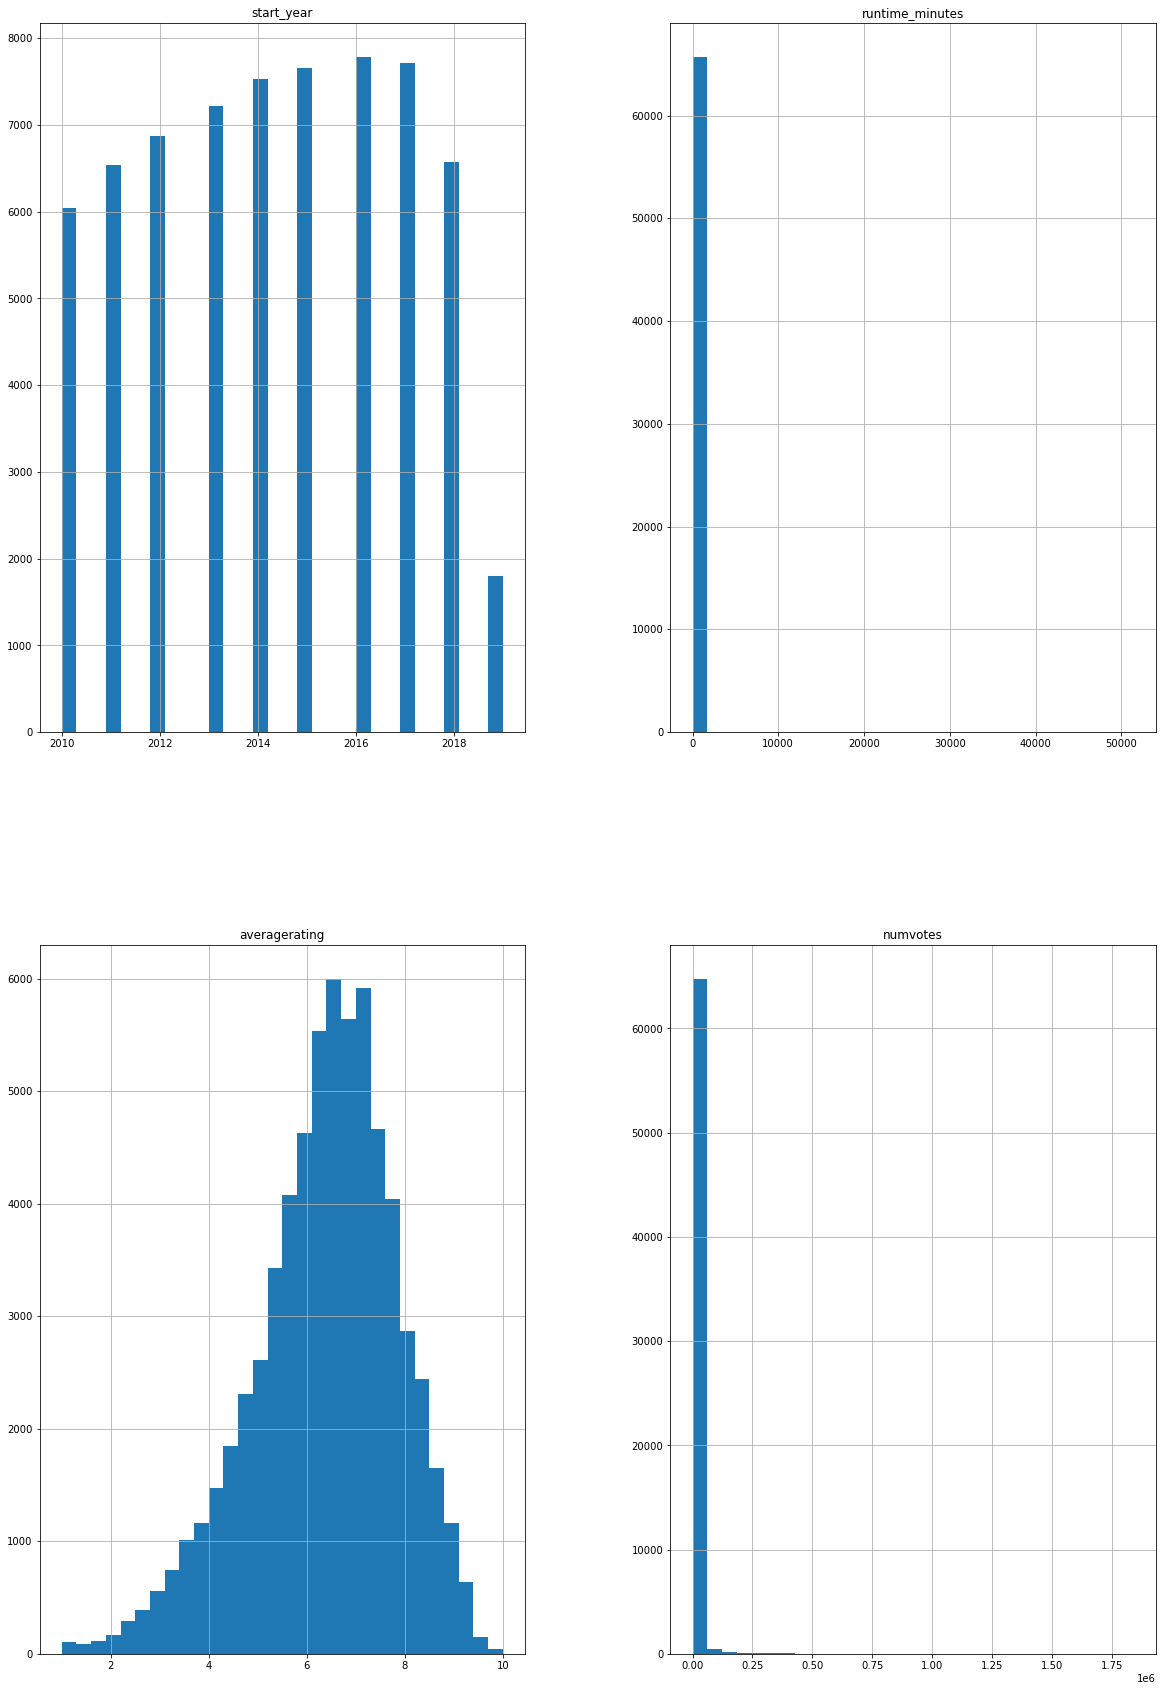

In [57]:
movies_df.hist(figsize= (20, 30), bins = 30)
plt.show() 

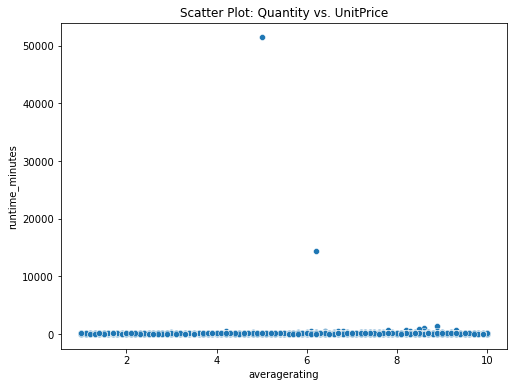

In [59]:
# Scatter plot for Quantity vs. UnitPrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=movies_df, x='averagerating', y='runtime_minutes')
plt.xlabel('averagerating')
plt.ylabel('runtime_minutes')
plt.title('Scatter Plot: Quantity vs. UnitPrice')
plt.show()